<a href="https://colab.research.google.com/github/Emanuelnabarrete/Curso-Machine-Learning_1/blob/main/Classifica%C3%A7%C3%A3o_%2BPrimeiros%2Bpassos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
dados = pd.read_csv("marketing_investimento.csv")

In [ ]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [ ]:
dados.aderencia_investimento.value_counts()

nao    766
sim    502
Name: aderencia_investimento, dtype: int64

## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [ ]:
# dados categoricos -> Estado_civil | escolaridade | inadimplencia | fez_emprestimo | aderencia_investimento

In [ ]:
px.histogram(dados, x = "aderencia_investimento", text_auto=True)

In [ ]:
px.histogram(dados, x = "estado_civil", text_auto=True , color = "aderencia_investimento", barmode = "group")

In [ ]:
px.histogram(dados, x = "escolaridade" , text_auto = True, color = "aderencia_investimento" , barmode = "group")

In [ ]:
px.histogram(dados, x = "inadimplencia" , text_auto = True, color = "aderencia_investimento" , barmode = "group")

In [ ]:
px.histogram(dados, x = "fez_emprestimo" , text_auto = True, color = "aderencia_investimento" , barmode = "group")

### Variáveis numéricas

In [ ]:
# Valores Numericos -> idade | saldo | tempo_ult_contato | numero_contatos

In [ ]:
px.box(dados, x = "idade" , color = "aderencia_investimento")

In [ ]:
px.box(dados, x = "saldo" , color = "aderencia_investimento")

In [ ]:
px.box(dados, x = "tempo_ult_contato" , color = "aderencia_investimento")

In [ ]:
px.box(dados, x = "numero_contatos" , color = "aderencia_investimento")

Selecionando a Variavel alvo

In [ ]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [ ]:
x  = dados.drop(columns="aderencia_investimento") # Variaveis
y = dados["aderencia_investimento"] # Variavel alvo

In [ ]:
from sklearn.compose import make_column_transformer # importamos a biblioteca que faz transformacoes
from sklearn.preprocessing import OneHotEncoder # algortimo de trandformacao numerica

In [ ]:
colunas = x.columns

In [ ]:
one_hot = make_column_transformer((OneHotEncoder(drop = "if_binary"), # Usamos "If_binary" para excluir uma coluna caso for binario
                                  ["estado_civil", "escolaridade", "inadimplencia","fez_emprestimo"]), # passando colunas q vamos transformar
                                   remainder="passthrough", # Nao remover as colunas n alteradas
                                   sparse_threshold=0) # Manter todos os valores de todfas as colunas.




In [ ]:
x  = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas) #'onehotencoder houve mudanca  ||| remainder n houve mudanca

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [ ]:
pd.DataFrame(x , columns = one_hot.get_feature_names_out(colunas)) # Dados trasformados em numeros

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


Transformando a Variavel Alvo
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder # Importando Biblioteca

In [ ]:
label_Enc = LabelEncoder() # atribuicao

In [ ]:
y = label_Enc.fit_transform(y) # transformacao

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y,stratify =y,random_state=5) # parametros de x e y || stratify serve para manter a proporsao de acordo com o valor passado (y) || Random_state -> divisao dos dados

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
DC = DummyClassifier()
DC.fit(x_train,y_train)# Treinando o Dummy

DummyClassifier()

In [ ]:
print(f"Score de {DC.score(x_test,y_test)} para o Dummy Classifier")# Score serve para ver a taxa de acerto do modelo

Score de 0.6025236593059937 para o Dummy Classifier


In [ ]:
print(f"Score de {DC.score(x_train,y_train)} para o Dummy Classifier")

Score de 0.6046267087276551 para o Dummy Classifier


Arvore de Decisao

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state=5) # Divisao dos dados

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [ ]:
tree.predict(x_test)# fazer a predicao

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:

print(f"Score de {tree.score(x_test,y_test)} para o Tree Classifier")

Score de 0.6656151419558359 para o Tree Classifier


Visualizando regra do modelo

In [ ]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

len(nome_colunas)

12

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


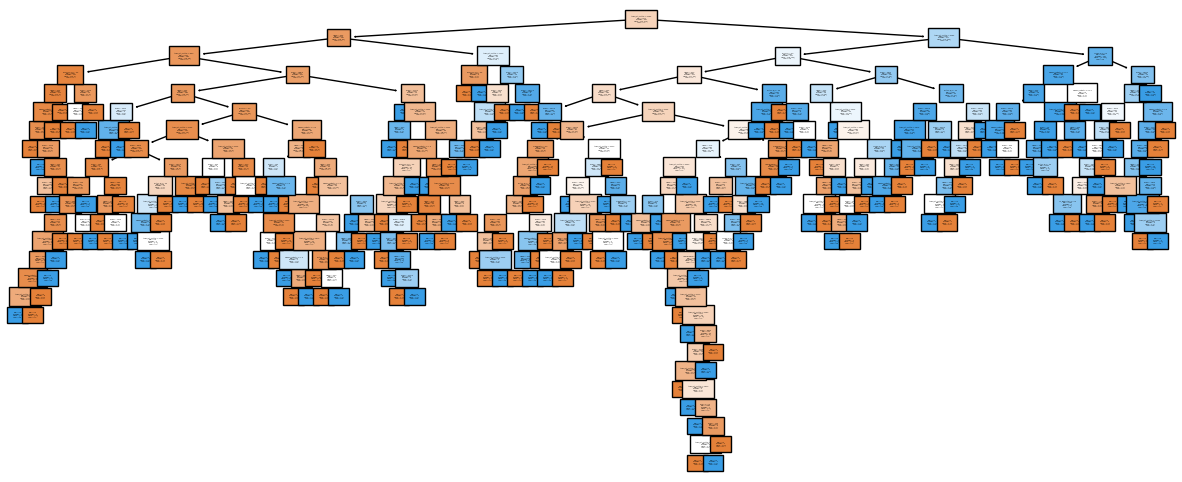

In [ ]:
plt.figure(figsize=(15,6))
plot_tree(tree,filled = True, class_names = ["nao" , "sim"], fontsize = 1, feature_names = nome_colunas);# vimos que houve muitos ramos, ou , regras

In [ ]:
print(f"Score de {tree.score(x_test,y_test)} para o Tree Classifier") # 66% para teste

Score de 0.6656151419558359 para o Tree Classifier


In [ ]:
print(f"Score de {tree.score(x_train,y_train)} para o Tree Classifier")# 100% para treino ----------> OverFitting

Score de 1.0 para o Tree Classifier


In [ ]:
# Para resolver, precisamos limitar as regras

In [ ]:
tree = DecisionTreeClassifier(random_state=5, max_depth=3) #apenas 3 ramificacoes

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
tree.score(x_train,y_train)
print(f"Score de {tree.score(x_test,y_test)} para o Tree Classifier com tres ramificacoes")

Score de 0.7160883280757098 para o Tree Classifier com tres ramificacoes


In [ ]:
print(f"Score de {tree.score(x_train,y_train)} para o Tree Classifier")

Score de 0.7613038906414301 para o Tree Classifier


In [ ]:
# Ocorreu um aumento, pois o modelo realmente aprendeu e nao decorou os padroes

In [ ]:
dados.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [ ]:
col = ['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento']
len(col)

9

[Text(0.5, 0.875, 'tempo_ult_contato <= 248.5\ngini = 0.478\nsamples = 951\nvalue = [575, 376]\nclass = No'),
 Text(0.25, 0.625, 'idade <= 59.5\ngini = 0.278\nsamples = 480\nvalue = [400, 80]\nclass = No'),
 Text(0.125, 0.375, 'tempo_ult_contato <= 86.5\ngini = 0.253\nsamples = 458\nvalue = [390, 68]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.061\nsamples = 127\nvalue = [123, 4]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.312\nsamples = 331\nvalue = [267, 64]\nclass = No'),
 Text(0.375, 0.375, 'tempo_ult_contato <= 142.0\ngini = 0.496\nsamples = 22\nvalue = [10, 12]\nclass = Yes'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Yes'),
 Text(0.75, 0.625, 'tempo_ult_contato <= 628.5\ngini = 0.467\nsamples = 471\nvalue = [175, 296]\nclass = Yes'),
 Text(0.625, 0.375, 'superior <= 0.5\ngini = 0.499\nsamples = 312\nvalue = [148, 164]\nclass = Yes'),
 Text(0.5625, 0.125, 'gini = 0.4

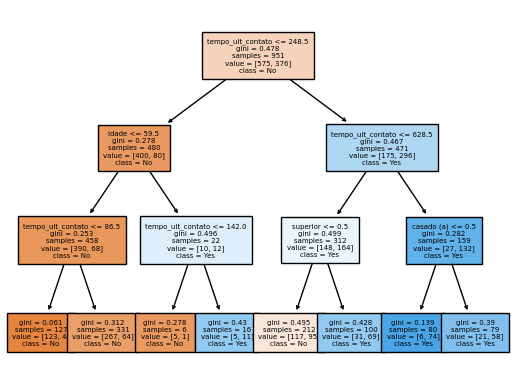

In [ ]:
plot_tree(tree,filled = True, class_names=["No", "Yes"],fontsize = 5, feature_names = nome_colunas)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # Deixar os dados na mesma escala

normalizacao = MinMaxScaler()

x_train_norm = normalizacao.fit_transform(x_train)# Alteracao para a mesma escala
x_test_norm = normalizacao.fit_transform(x_test)  # Alteracao para a mesma escala

In [ ]:
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Importando

In [ ]:
KNN = KNeighborsClassifier()

KNN.fit(x_train_norm, y_train) # Treinando


KNN.score(x_test_norm, y_test) # testando | Acuracia



0.6750788643533123

In [ ]:
print(f"DummyClassifier {DC.score(x_test,y_test)}")
print(f"TreeDecisionClassifier {tree.score(x_test,y_test)}") # Melhor adequado ao modelo
print(f"KNNClassifier {KNN.score(x_test,y_test)}")

DummyClassifier 0.6025236593059937
TreeDecisionClassifier 0.7160883280757098
KNNClassifier 0.5331230283911672


In [ ]:
import pickle

with open("modeloON.pkl" , "wb") as arquivo:
  pickle.dump(one_hot, arquivo)  # Exportando arquivo



In [ ]:
with open("modelotree.pkl" , "wb") as arquivo:
  pickle.dump(tree, arquivo)  # Exportando arquivo

In [ ]:
#--------------------------------- NEW ARQUIVO --------------------------------------


In [ ]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [ ]:
modelo_onehot = pd.read_pickle("/content/modeloON.pkl")
modelo_tree = pd.read_pickle("/content/modelotree.pkl")

In [ ]:
novo_dado = pd.DataFrame(novo_dado) # Jogar para DF |||| Mudar com one hot

In [ ]:
novo_dado = modelo_onehot.transform(novo_dado)

In [ ]:
modelo_tree.predict(novo_dado)

array([1])